In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.9.1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
mnist = keras.datasets.fashion_mnist # Fashion Image dataset
type(mnist)

module

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

4422102/4422102 [==============================] - 15s 3us/step


In [5]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [6]:
np.max(X_train)

255

In [7]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [12]:
class_names = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandle', 'shirt', 'sneaker', 'bag', 'ankle boot']

In [13]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

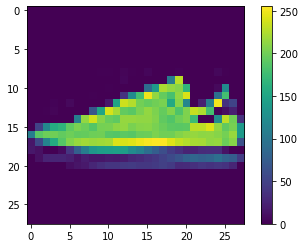

In [19]:
plt.figure()
plt.imshow(X_train[6])
plt.colorbar()

In [18]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [20]:
X_train = X_train/255.0
X_test = X_test/255.0

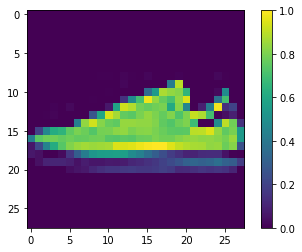

In [21]:
plt.figure()
plt.imshow(X_train[6])
plt.colorbar()

## Build the model with Tensorflow 2.0

In [22]:
# Import libraries
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [24]:
# Build Model
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation = 'relu')) # 128 neuron
model.add(Dense(10, activation = 'softmax')) # 10 neuron
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Model compilation
# loss function -> It will measure how accurate the model during the training, Minimize the overall error during the training.

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4986 - accuracy: 0.8251
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3744 - accuracy: 0.8639
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3348 - accuracy: 0.8788
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3110 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2916 - accuracy: 0.8932
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2798 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2657 - accuracy: 0.9012
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2563 - accuracy: 0.9041
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2458 - accuracy: 0.9085
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2

In [28]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)

313/313 [==============================] - 2s 4ms/step - loss: 0.3609 - accuracy: 0.8709
0.8708999752998352


In [29]:
from sklearn.metrics import accuracy_score

In [38]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets